In [ ]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Bike = pd.read_csv("/content/drive/MyDrive/TMLC/Seoul-Bike-Trip-Duration.zip")

In [ ]:
display(Bike.head())
display(Bike.tail())

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,43,0,1,1,0,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,54,0,1,1,0,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,59,0,1,1,0,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,55,0,1,1,1,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601138,9830310,116,1410,37.585655,127.075050,37.585655,127.075050,0.000000,12,31,23,33,0,1,1,1,30,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [ ]:
Bike.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
Bike.shape

(9601139, 25)

In [ ]:
Bike_original = Bike.copy()

In [ ]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


In [ ]:
Bike.count()

Duration      9601139
Distance      9601139
PLong         9601139
PLatd         9601139
DLong         9601139
DLatd         9601139
Haversine     9601139
Pmonth        9601139
Pday          9601139
Phour         9601139
Pmin          9601139
PDweek        9601139
Dmonth        9601139
Dday          9601139
Dhour         9601139
Dmin          9601139
DDweek        9601139
Temp          9601139
Precip        9601139
Wind          9601139
Humid         9601139
Solar         9601139
Snow          9601139
GroundTemp    9601139
Dust          9601139
dtype: int64

In [ ]:
Bike.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


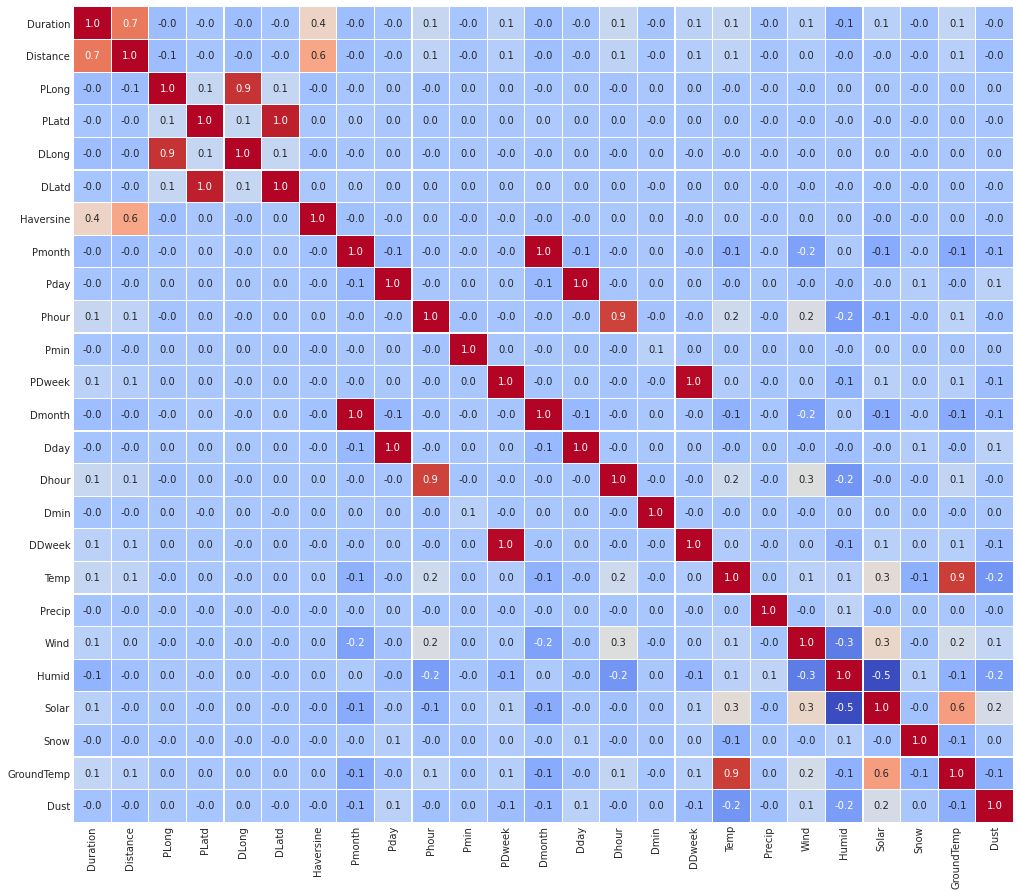

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(Bike.corr(method='pearson'), fmt='.1f', annot=True, cbar=False, linewidth=0.2, cmap='coolwarm');

- After creating the final dataset, the next step is to check whether the considered variables used for predicting the trip duration is correlated with the dependent variable. So a correlation plot is created for finding the relationship among the variables. Fig. 11 shows the pairs plot and displays the correlation values of Trip duration with Distance, PLong, PLatd, DLong, DLatd, Haversine, Temp, Precip, Wind, Humid, Snow, GroundTemp and Dust. As can be seen from the plot that the dependent variable Duration has at least least correlation value with the independent variables. This shows the trip duration variable is associated with other variables considered in this study. Positive values represent a positive correlation between the variables and negative value represents a negative correlation between the variables. The highest correlation value exists between Duration and Distance variables.

In [ ]:
# FEATURE IMPORTANCE CORRELATION
# determine 20 most correlated features

Bike_corr = Bike.corr()['Duration'].sort_values(ascending=False).head(25)
top_corr_features = Bike_corr.index
top_corr_features

Index(['Duration', 'Distance', 'Haversine', 'Dhour', 'Phour', 'Temp',
       'GroundTemp', 'DDweek', 'PDweek', 'Wind', 'Solar', 'PLatd', 'DLatd',
       'Pmin', 'Precip', 'Pday', 'Dday', 'Dmin', 'Snow', 'Dust', 'DLong',
       'Dmonth', 'Pmonth', 'PLong', 'Humid'],
      dtype='object')

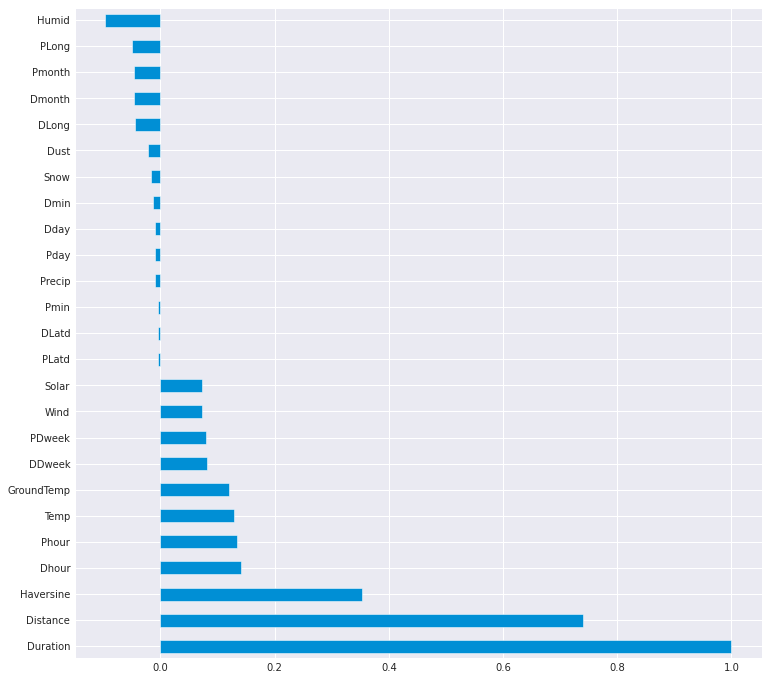

In [ ]:
# plot top 20 most correlated features to our target (Class)
plt.figure(figsize=(11,12))
Bike_corr.plot(kind='barh')
plt.show()

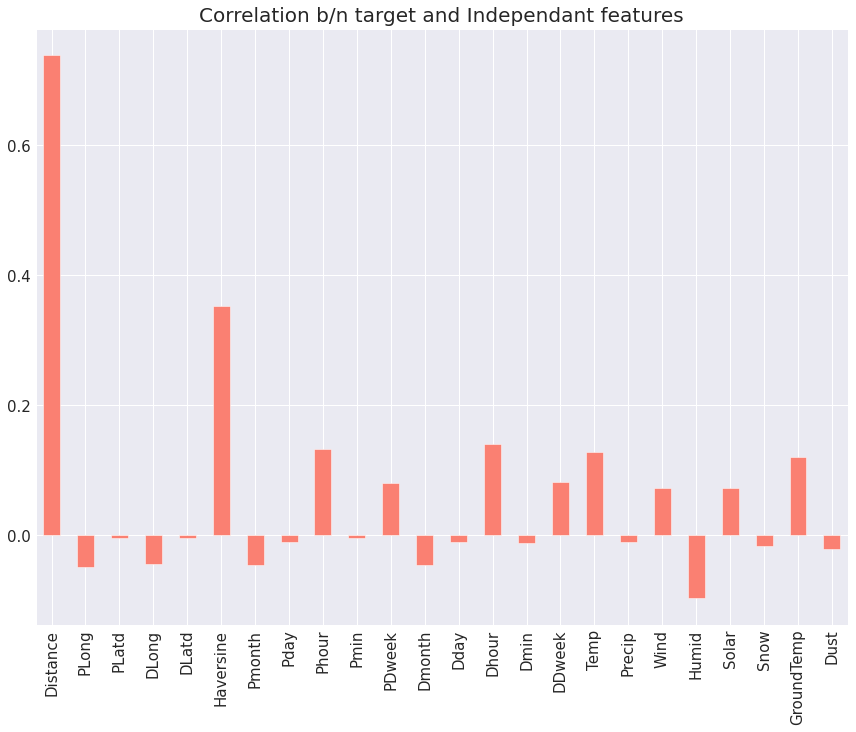

In [ ]:
a = Bike.drop(['Duration'], axis=1)
a.corrwith(Bike['Duration']).plot(kind='bar', figsize=(13,11), color=['salmon'])
plt.title('Correlation b/n target and Independant features', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
Bike['Duration'].value_counts()

5      434870
6      431674
4      415106
7      410592
8      389080
        ...  
115     10900
116     10352
117      9851
118      8817
119      7685
Name: Duration, Length: 119, dtype: int64

### **Data Preprocessing**

#### **a) Missing Values**

- Dropping **0** entries in **Trip duration and Trip distance** is the first step.

In [ ]:
Bike.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

##### **Duplicate rows**

In [ ]:
Bike.duplicated().value_counts()

False    9577233
True       23906
dtype: int64

In [ ]:
# Remove all duplicates
Bike.drop_duplicates(inplace=True)
print("Dataset size before removing duplicates:", Bike_original.shape)
print("Dataset size after removing duplicates:", Bike.shape)

Dataset size before removing duplicates: (9601139, 25)
Dataset size after removing duplicates: (9577233, 25)


#### **b) Outliers**

- remove outliers in Trip duration and Trip distance field

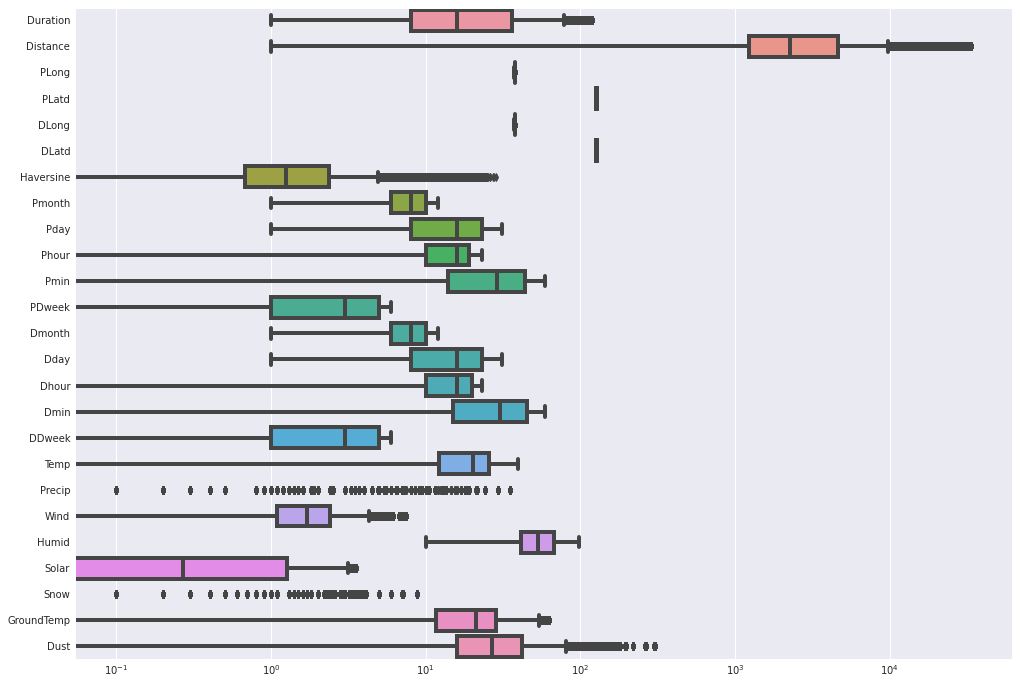

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=Bike, orient='h');
plt.xscale('log')

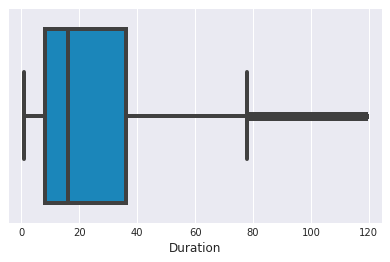

In [ ]:
sns.boxplot(data=Bike, x='Duration');

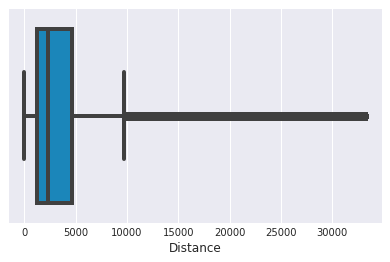

In [ ]:
sns.boxplot(data=Bike, x='Distance');

#### **3) Exploratory Data Analysis**

- https://github.com/thomastrg/SeoulBikeDemand_DataAnalysis

- https://anindya-saha.github.io/blog/machine-learning-with-python/kaggle-bike-sharing-demand/kaggle-bike-sharing-demand.html

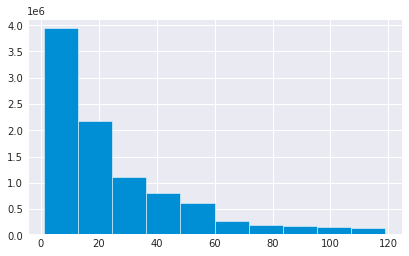

In [ ]:
plt.hist(Bike['Duration']);

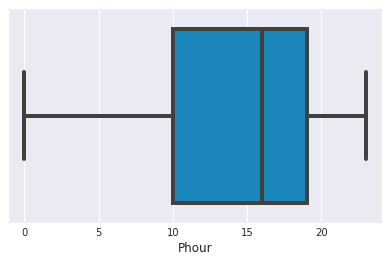

In [ ]:
sns.boxplot(data=Bike, x='Phour');